In [1]:
import pandas as pd
from scipy import stats

In [2]:
data_frame = pd.read_csv('datasets/S&P500_EOD-Price.csv')
data_frame = data_frame.dropna(axis=1)

data_frame.head()

,Date,APA,MTCH,GEN,DXC,EG,BKR,AMD,HON,BALL,...,SNPS,SWKS,ZION,TTWO,VRTX,TRMB,ZBRA,LNT,BBWI,WBA
0,2000-01-03,14.772727,7.527071,7.109375,46.327873,21.8750,20.2500,15.500,54.044136,2.488281,...,32.781250,31.406250,55.5000,9.125000,18.78125,4.145833,25.027779,13.40625,16.395514,28.5625
1,2000-01-04,14.123377,6.921444,6.781250,46.017365,21.8125,20.2500,14.625,53.090767,2.406250,...,30.437500,29.562500,52.8125,8.875000,17.28125,4.072917,24.666668,13.40625,16.067099,27.5000
2,2000-01-05,14.529221,6.661890,6.375000,42.788074,23.2500,20.3750,15.000,52.375736,2.449219,...,30.703125,30.328125,52.7500,8.833333,17.00000,3.817708,25.138889,14.06250,15.839733,27.8125
3,2000-01-06,15.909091,6.938748,6.007813,43.409092,24.3125,22.3125,16.000,53.388695,2.488281,...,28.468750,27.375000,53.5000,8.750000,16.75000,3.854167,23.777779,14.06250,15.587106,27.0000
4,2000-01-07,15.854978,6.904141,6.484375,43.315941,25.6250,23.8125,16.250,56.248802,2.417969,...,28.750000,30.187500,53.6250,9.000000,18.21875,3.854167,23.513889,14.25000,15.688157,27.6875


In [6]:
data_frame["Date"] = pd.to_datetime(data_frame["Date"])
data_frame['Year'] = data_frame["Date"].dt.year

processing_years = [year for year in range(2000, 2025)]
data_frame_annual_returns = []

for year in processing_years:
    filtered_data = data_frame[data_frame['Year'] == year]
    for column in filtered_data.columns:
        if column not in ["Date", "Year"]:
            first_value = filtered_data[column].iloc[0]
            last_value = filtered_data[column].iloc[-1]
            annual_return = (last_value - first_value) / first_value
            annual_returns = [((filtered_data[column].iloc[i] - filtered_data[column].iloc[0]) / filtered_data[column].iloc[0]) for i in range(len(filtered_data))]
            
            relative_percentile = stats.percentileofscore(annual_returns, annual_return)
            
            data_frame_annual_returns.append({'Stock': column, 'Year': year, 'Annual_Return': annual_return, 'Relative_Percentile': relative_percentile})


result_df = pd.DataFrame(data_frame_annual_returns)

,Stock,Year,Annual_Return,Relative_Percentile
9025,SCHW,2024,0.008249,100.000000
9026,T,2024,-0.002319,72.727273
9027,UHS,2024,0.150118,98.181818
9028,WAB,2024,0.134800,98.181818
9029,WRB,2024,0.196951,100.000000
...,...,...,...,...
9120,TRMB,2024,0.215253,100.000000
9121,ZBRA,2024,0.066535,89.090909
9122,LNT,2024,-0.059368,55.454545
9123,BBWI,2024,0.074860,98.181818


In [8]:
result_df.head(100)

,Stock,Year,Annual_Return,Relative_Percentile
0,APA,2000,1.053114,99.206349
1,MTCH,2000,-0.285057,22.420635
2,GEN,2000,-0.413187,2.777778
3,DXC,2000,-0.355228,0.396825
4,EG,2000,2.274286,98.412698
...,...,...,...,...
95,WEC,2000,0.183607,98.809524
96,ECL,2000,0.145937,97.817460
97,LEG,2000,-0.079027,64.285714
98,NEE,2000,0.739394,99.206349


c:\users\cigan\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


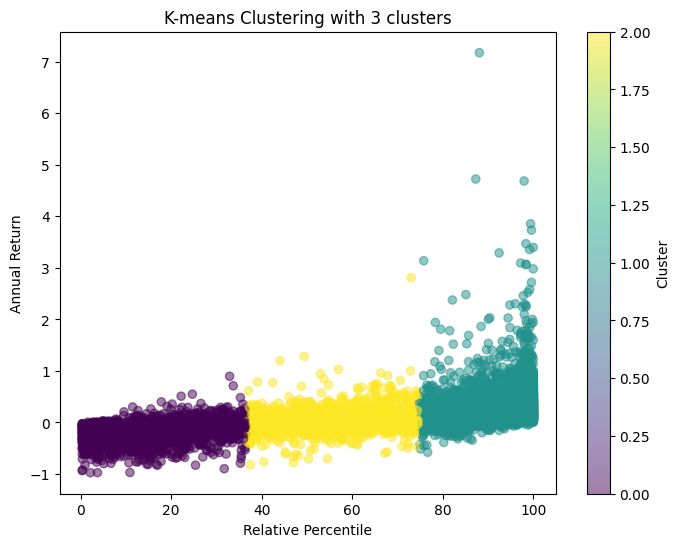

   Stock  Year  Annual_Return  Relative_Percentile  Cluster
0    APA  2000       1.053114            99.206349        1
1   MTCH  2000      -0.285057            22.420635        0
2    GEN  2000      -0.413187             2.777778        0
3    DXC  2000      -0.355228             0.396825        0
4     EG  2000       2.274286            98.412698        1
..   ...   ...            ...                  ...      ...
95   WEC  2000       0.183607            98.809524        1
96   ECL  2000       0.145937            97.817460        1
97   LEG  2000      -0.079027            64.285714        2
98   NEE  2000       0.739394            99.206349        1
99   CCI  2000      -0.113613            19.047619        0

[100 rows x 5 columns]


In [25]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clustering_data = result_df[['Annual_Return', 'Relative_Percentile']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(clustering_data)

result_df['Cluster'] = kmeans.labels_
plt.figure(figsize=(8, 6))
plt.scatter(result_df['Relative_Percentile'], result_df['Annual_Return'], c=result_df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-means Clustering with 3 clusters')
plt.xlabel('Relative Percentile')
plt.ylabel('Annual Return')
plt.colorbar(label='Cluster')
plt.show()

print(result_df.head(100))
